 Clustering is an unsupervised learning technique, so it is hard to evaluate the quality of the output
 of any given method. Intuitively, the goal of clustering is to assign points that are similar to the same cluster, and to ensure that points that are dissimilar are in different clusters. 

There are several ways of measuring clustering. However, measuring metrics may be of limited use. An
 alternative is to rely on some external form of data with which to validate the method. For example,
 if we have labels for each object, then we can assume that objects with the same label are similar. We can then use the metrics we discuss below to quantify the quality of the clusters.

# Labelled Data - Clustering Quality Evaluation Metrics

### Purity

The purity ranges between 0 (bad) and 1 (good). However, we can trivially achieve a purity of 1 by 
 putting each object into its own cluster, so this measure does not penalize for the number of clusters.
<p align="center">
  <img src="./images/clusters1.png"/>
</p>



In [19]:
# Define the clusters
clusters = [
    {"A": 5, "B": 1},
    {"A": 1, "B": 4, "C": 1},
    {"A": 2, "C": 3}
]

# Calculate the total points across all clusters
total_points = sum(sum(cluster.values()) for cluster in clusters)

# Calculate the total points for each majority class count
majority_sum = sum(max(cluster.values()) for cluster in clusters)

# Calculate and print the purity (purity = majority points / total points)
print(f"Purity: {majority_sum / total_points:.2f}")

Purity: 0.71


### Rand Index & Adjusted Rand Index

The Rand Index ranges between 0 (bad) and 1 (good). It measures how similar a predicted clustering is to the true class labels, based on all possible pairs of data points. A score of 1 means that every pair of points was either correctly grouped together or correctly kept apart.

However, the Rand Index does not penalize for random chance: even poorly structured clusterings can sometimes get a high score simply by agreeing on many "different" pairs. That’s why an adjusted version, the Adjusted Rand Index (ARI), is often used as it corrects for the level of agreement expected by chance. 

The Adjusted Rand Index (ARI) ranges between -1 and 1, where 1 means a perfect match between the predicted clustering and the true labels, 0 means the clustering is no better than random chance, and negative values indicate worse-than-random clusterings.

<p align="center">
  <img src="./images/clusters1.png"/>
</p>

In [20]:
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score

# Define the clusters and their true labels

true_labels = ['A','A','A','A','A','B', 
               'A','B','B','B','B','C', 
               'A','A','C','C','C']

predicted_labels = [0,0,0,0,0,0, 
                    1,1,1,1,1,1, 
                    2,2,2,2,2]

# Compute Rand Index
print(f"Rand Index: {rand_score(true_labels, predicted_labels):.2f}")

# Compute Adjusted Rand Index
print(f"Adjusted Rand Index: {adjusted_rand_score(true_labels, predicted_labels):.2f}")

Rand Index: 0.68
Adjusted Rand Index: 0.24


### Mutual Information and Normalized Mutual Information

Mutual Information (MI) measures how much information the predicted clustering shares with the true labels. Higher values mean better agreement, but MI is unnormalized and depends on cluster sizes. Normalized Mutual Information (NMI) scales MI between 0 (no cluster-label ralation) and 1 (perfect correlation).


<p align="center">
  <img src="./images/clusters1.png"/>
</p>

In [21]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

# Define the clusters and their true labels

true_labels = ['A','A','A','A','A','B', 
               'A','B','B','B','B','C', 
               'A','A','C','C','C']

predicted_labels = [0,0,0,0,0,0, 
                    1,1,1,1,1,1, 
                    2,2,2,2,2]

# Compute Mutual Information
print(f"Mutual Information: {mutual_info_score(true_labels, predicted_labels):.2f}")

# Compute Normalized Mutual Information (NMI)
print(f"Normalized Mutual Information: {normalized_mutual_info_score(true_labels, predicted_labels):.2f}")

Mutual Information: 0.39
Normalized Mutual Information: 0.36


# Unlabelled Data - Clustering Techniques

### Aglomerative (Bottom-Up Hierarchy)

Agglomerative clustering is a bottom-up hierarchical clustering method where each data point starts as its own cluster. At each step, the two closest clusters are merged until all points form a single cluster or a stopping condition is met.

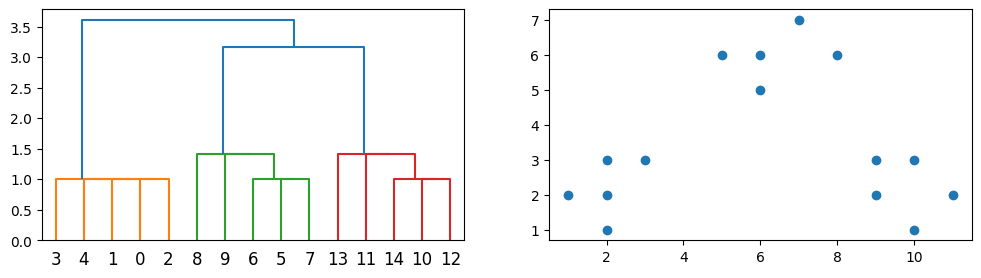

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the data points for clustering
data_points = np.array([
    [1, 2], [2, 1], [2, 2], [3, 3], [2, 3],
    [5, 6], [6, 5], [6, 6], [8, 6], [7, 7],
    [9, 2], [10, 1], [9, 3], [11, 2], [10, 3]])

# Perform hierarchical/agglomerative clustering
aglomerative_tree = linkage(data_points, method='single', metric='euclidean')

#Plot the dendrogram and the data points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
dendrogram(aglomerative_tree, ax=ax1)
ax2.scatter(data_points[:, 0], data_points[:, 1])
plt.show()